In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor





In [4]:
df=pd.read_csv("F:/dissertation/Boston_Housing final.csv")

In [5]:
df=df.drop("Unnamed: 14",axis=1)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
colnames=df.columns

In [ ]:
stat=df.describe().T

In [ ]:
stat

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


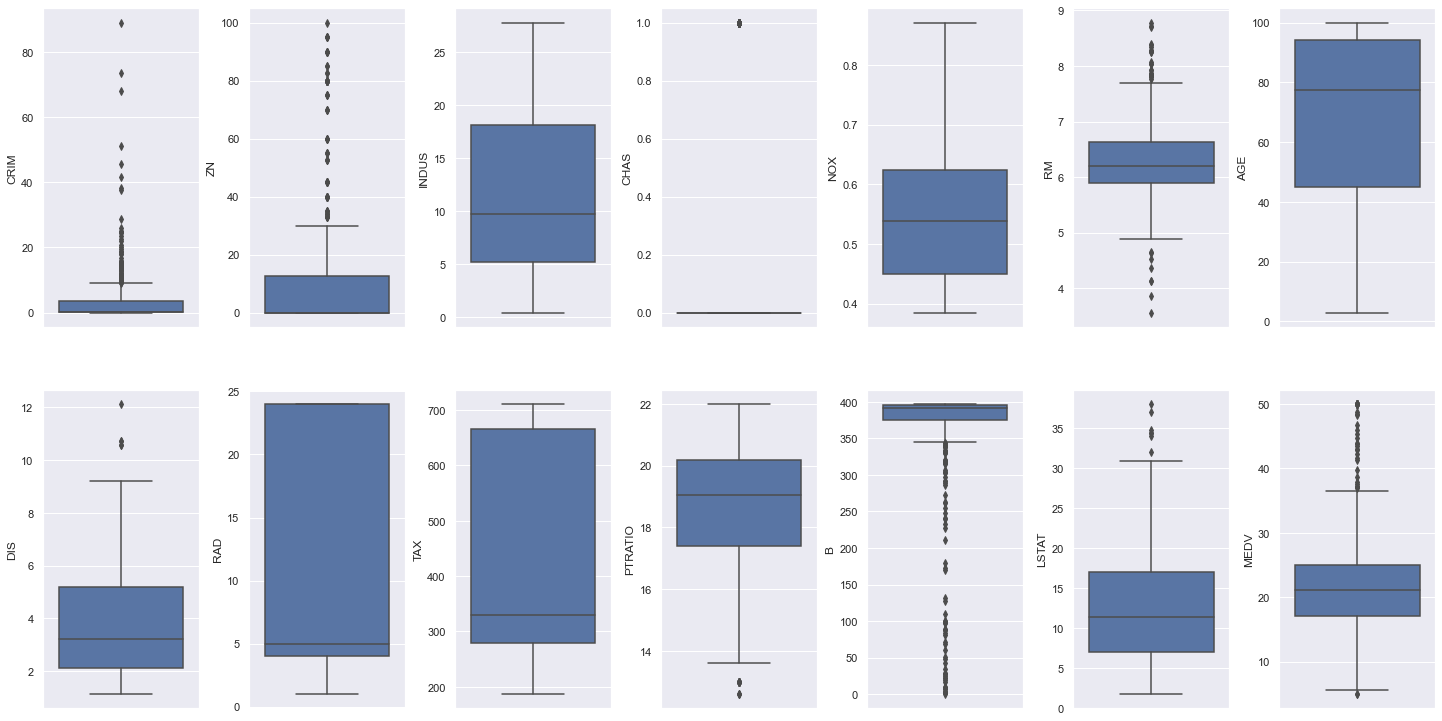

In [ ]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
Q1 = df['CRIM'].quantile(0.25)
Q3 = df['CRIM'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['CRIM'] > upper_bound) | (df['CRIM'] < lower_bound)]

mean_value = df['CRIM'].mean()
df['CRIM'].loc[outliers.index] = mean_value

print( len(outliers))

66


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17072\1679462823.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRIM'].loc[outliers.index] = mean_value


<AxesSubplot:>

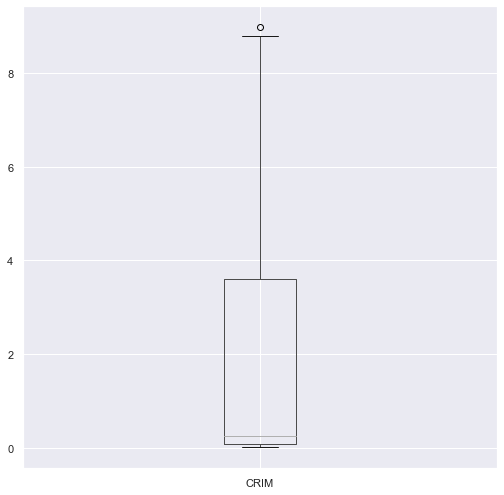

In [ ]:
df.boxplot("CRIM")

In [ ]:



Q1 = df['ZN'].quantile(0.25)
Q3 = df['ZN'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['ZN'] > upper_bound) | (df['ZN'] < lower_bound)]

mean_value = df['ZN'].mean()
df['ZN'].loc[outliers.index] = mean_value

print( len(outliers))


68


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17072\1815874034.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZN'].loc[outliers.index] = mean_value


<AxesSubplot:>

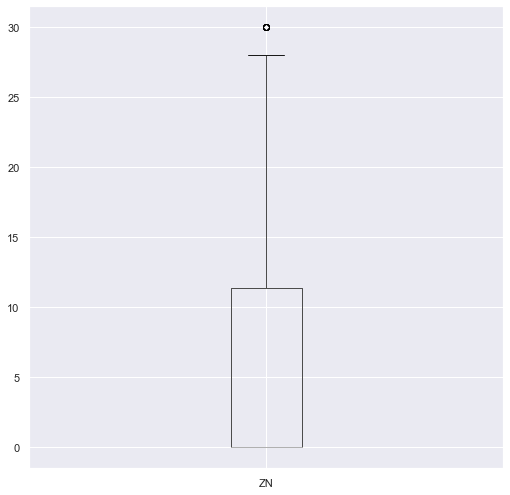

In [ ]:
df.boxplot("ZN")

In [ ]:



Q1 = df['B'].quantile(0.25)
Q3 = df['B'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['B'] > upper_bound) | (df['B'] < lower_bound)]

mean_value = df['ZN'].mean()
df['B'].loc[outliers.index] = mean_value

print( len(outliers))


77


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17072\1798655198.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['B'].loc[outliers.index] = mean_value


<AxesSubplot:>

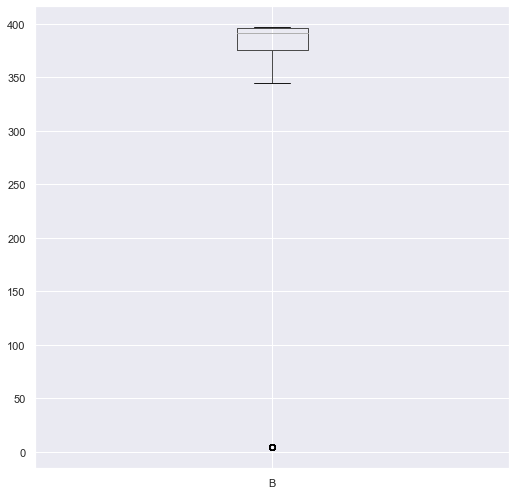

In [ ]:
df.boxplot("B")

In [ ]:
df2=df.drop("MEDV",axis=1)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

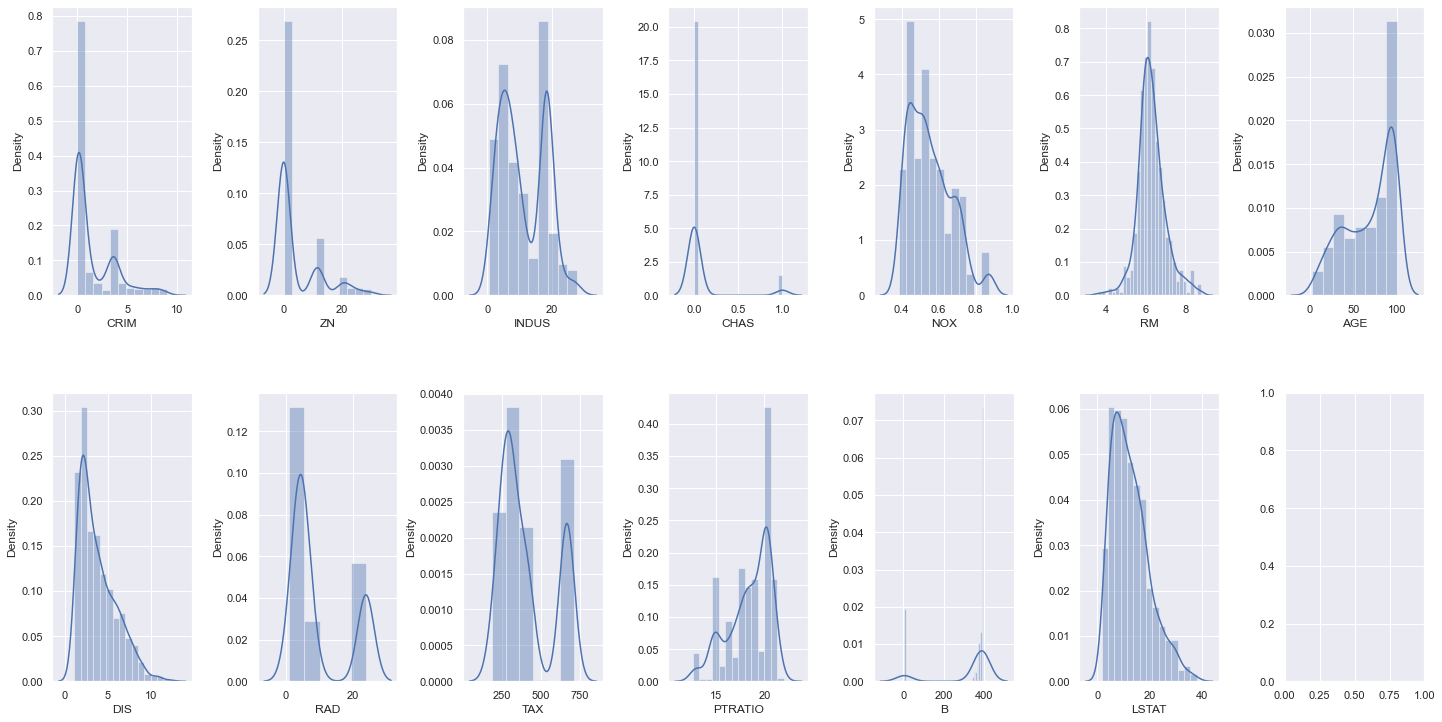

In [ ]:
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df2.items():
    sns.distplot(value,ax=ax[index])
    index +=1
    
        
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


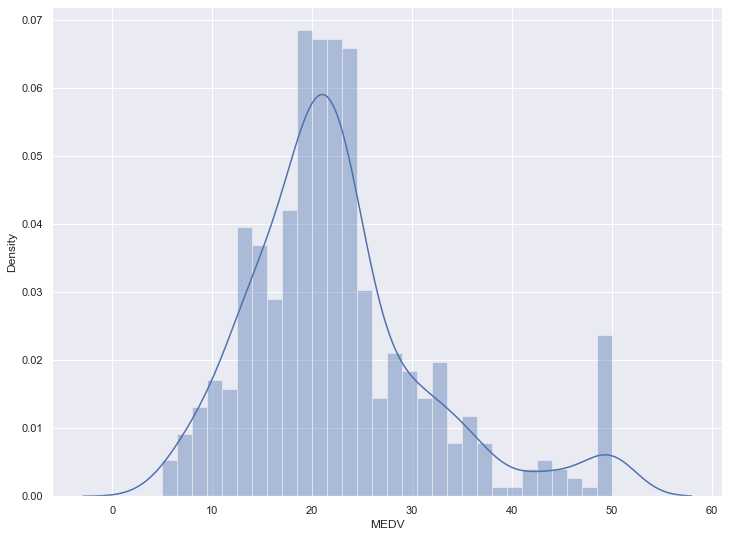

In [ ]:
# fix the figure size
sns.set(rc={'figure.figsize':(12,9)})
 
# Create a histogram that depicts the target values' distribution.
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Focus on "medv" correlation
medv_corr = correlation_matrix['MEDV']

# Display the correlation results for "medv"
print(medv_corr)

CRIM      -0.356316
ZN         0.314398
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.345993
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


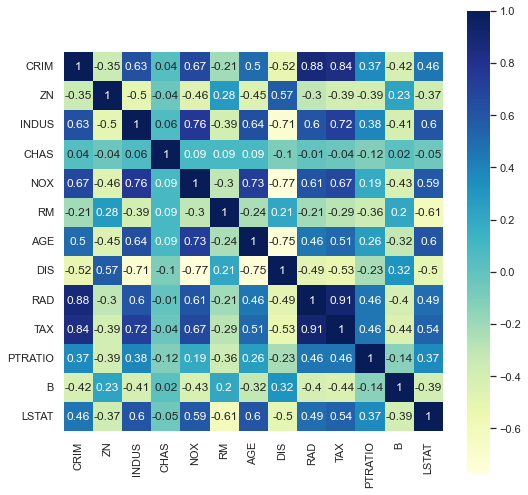

In [ ]:

sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(df2.corr().round(2), square=True, cmap='YlGnBu', annot=True);


tax and nox removed

In [ ]:
features1=['CRIM', 'ZN', 'INDUS', 'CHAS',  'RM', 'AGE', 'DIS', 'RAD', 
       'PTRATIO', 'B', 'LSTAT']

In [ ]:
X = df[features1]
Y = df.MEDV


# Add a constant column to the features matrix for the intercept term in OLS
X = sm.add_constant(X)

# Perform OLS
model = sm.OLS(y, X).fit()

# Print the summary of OLS results
print(model.summary())

# Extract the p-values of the features from the OLS results
p_values = model.pvalues[1:]

# Select features with p-values less than 0.05 (significance level)
selected_features = p_values[p_values < 0.05].index.tolist()
print("Selected Features: ", selected_features)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     110.7
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          1.18e-125
Time:                        22:13:18   Log-Likelihood:                -1525.8
No. Observations:                 506   AIC:                             3076.
Df Residuals:                     494   BIC:                             3126.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9710      4.280      5.601      0.0

In [ ]:
features2=['INDUS', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

In [ ]:
df3=pd.DataFrame()
df3=df[['INDUS', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT','MEDV']]


In [ ]:
X=df3[['INDUS', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']]
Y=df3.MEDV

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

lrpred = lr.predict(X_test)

lrprediction = pd.DataFrame({'Actual': Y_test, 'Predicted': lrpred})

lrprediction.head()


,Actual,Predicted
173,23.6,28.752423
274,32.4,34.282449
491,13.6,16.352635
72,22.8,24.119568
452,16.1,18.836906


In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dtpred = dt.predict(X_test)

dtprediction = pd.DataFrame({'Actual': y_test, 'Predicted': dtpred})
dtprediction.head()

,Actual,Predicted
173,23.6,20.5
274,32.4,32.0
491,13.6,17.4
72,22.8,21.7
452,16.1,15.2


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, Y_train)

rfpred = rf.predict(X_test)

rfprediction = pd.DataFrame({'Actual': Y_test, 'Predicted': rfpred})

rfprediction.head()

,Actual,Predicted
173,23.6,23.341
274,32.4,30.986
491,13.6,15.838
72,22.8,23.653
452,16.1,15.694


In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train, Y_train)

knnpred = knn.predict(X_test)

knnprediction = pd.DataFrame({'Actual': Y_test, 'Predicted': knnpred})

knnprediction.head()

,Actual,Predicted
173,23.6,27.99
274,32.4,28.14
491,13.6,17.68
72,22.8,26.74
452,16.1,16.60


In [ ]:
accurac = cvs(rf, X_train, Y_train, scoring='r2', cv=5)

In [ ]:
accurac.mean()

0.8110095645382728

In [ ]:
accuracy.mean()

0.724435734224026

In [ ]:

lr_rmse = np.sqrt(mean_squared_error(Y_test, lrpred))
print("Linear Regression RMSE:", lr_rmse)

dt_rmse = np.sqrt(mean_squared_error(Y_test, dtpred))
print("Decision Tree RMSE:", dt_rmse)

rf_rmse = np.sqrt(mean_squared_error(Y_test, rfpred))
print("Random Forest RMSE:", rf_rmse)

knn_rmse = np.sqrt(mean_squared_error(Y_test, knnpred))
print("KNN RMSE:", knn_rmse)

Linear Regression RMSE: 5.143716183959177
Decision Tree RMSE: 5.338125910400963
Random Forest RMSE: 3.3260533581373086
KNN RMSE: 4.392744128718648


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, rfpred)

# Print R-squared value
print("R-squared value:", r2)

R-squared value: 0.8491468670450119


Random Forest model is able to account for 84.91% of the variability in the test data's target variable based on its predictions. This suggests that the model has a good level of predictive performance, as a higher R-squared value indicates a better fit of the model to the data.

In [ ]:
importances = rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)

   Feature  Importance
2       RM    0.514149
6    LSTAT    0.328396
3      DIS    0.087466
4  PTRATIO    0.029798
5        B    0.020202
0    INDUS    0.018143
1     CHAS    0.001847


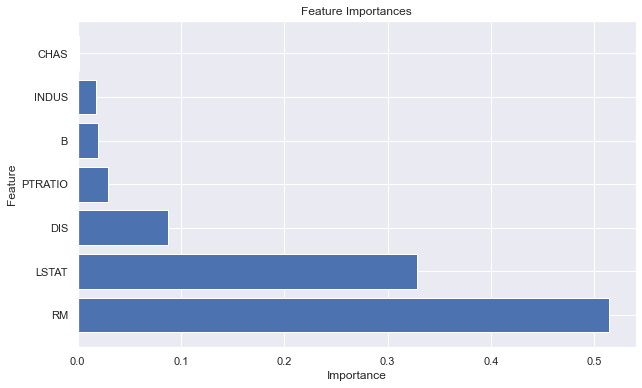

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(importance_df['Feature'], importance_df['Importance'])

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importances')

plt.show()

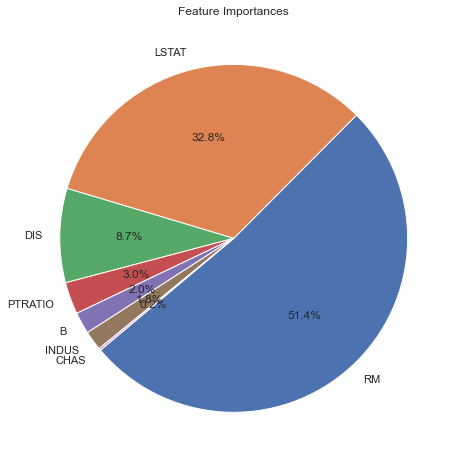

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(importance_df['Importance'], labels=importance_df['Feature'], autopct='%1.1f%%', startangle=220)

ax.set_title('Feature Importances')

plt.show()

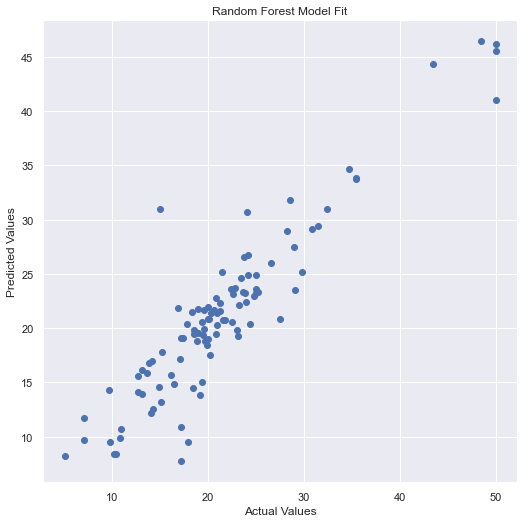

In [ ]:
plt.scatter(rfprediction['Actual'], rfprediction['Predicted'])

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')

plt.title('Random Forest Model Fit')

plt.show()

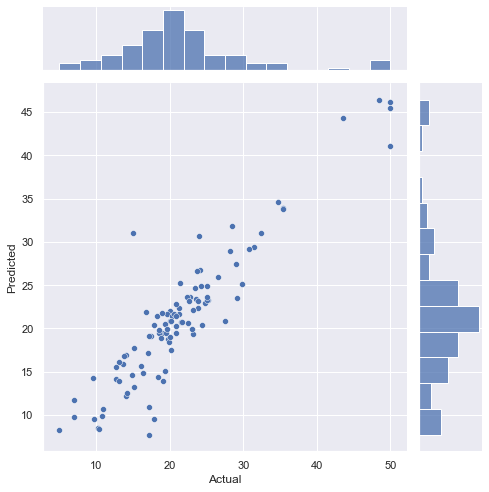

In [ ]:
sns.jointplot(x=rfprediction['Actual'], y=rfprediction['Predicted'], kind='scatter', height=7)
plt.show()